In [1]:
import operator

# A List of Stopwords taken from the Internet

In [4]:
stop_words=["a","the","able","about","data", "about", "above",
            "above", "across", "after", "afterwards", "again", 
            "against", "all", "almost", "alone", "along", "already", 
            "also","although","always","am","among", "amongst", 
            "amoungst", "amount",  "an", "and", "another", "any",
            "anyhow","anyone","anything","anyway", "anywhere", "are", 
            "around", "as",  "at", "back","be","became", "because",
            "become","becomes", "becoming", "been", "before", "beforehand"
            , "behind", "being", "below", "beside", "besides", 
            "between", "beyond", "bill", "both", "bottom","but", "by",
            "call", "can", "cannot", "cant", "co", "con", "could", 
            "couldnt", "cry", "de", "describe", "detail", "do", "done", 
            "down", "due", "during", "each", "eg", "eight", "either", 
            "eleven","else", "elsewhere", "empty", "enough", "etc", 
            "even", "ever", "every", "everyone", "everything", 
            "everywhere", "except", "few", "fifteen", "fify", "fill",
            "find", "fire", "first", "five", "for", "former", "formerly",
            "forty", "found", "four", "from", "front", "full", "further",
            "get", "give", "go", "had", "has", "hasnt", "have", "he",
            "hence", "her", "here", "hereafter", "hereby", "herein", 
            "hereupon", "hers", "herself", "him", "himself", "his", 
            "how", "however", "hundred", "ie", "if", "in", "inc", 
            "indeed", "interest", "into", "is", "it", "its", "itself", 
            "keep", "last", "latter", "latterly", "least", "less", 
            "ltd", "made", "many", "may", "me", "meanwhile", "might", 
            "mill", "mine", "more", "moreover", "most", "mostly", 
            "move", "much", "must", "my", "myself", "name", "namely", 
            "neither", "never", "nevertheless", "next", "nine", "no",
            "nobody", "none", "noone", "nor", "not", "nothing", "now", 
            "nowhere", "of", "off", "often", "on", "once", "one", "only", 
            "onto", "or", "other", "others", "otherwise", "our", "ours",
            "ourselves", "out", "over", "own","part", "per", "perhaps",
            "please", "put", "rather", "re", "same", "see", "seem", "seemed",
            "seeming", "seems", "serious", "several", "she", "should", "show",
            "side", "since", "sincere", "six", "sixty", "so", "some", "somehow",
            "someone", "something", "sometime", "sometimes", "somewhere", "still",
            "such", "system", "take", "ten", "than", "that", "the", "their", "them",
            "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", 
            "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this",
            "those", "though", "three", "through", "throughout", "thru", "thus", "to", 
            "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", 
            "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were",
            "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby",
            "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", 
            "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours",
            "yourself","yourselves", "the"]

# Here we are creating a Dictionary which has the words as it's Keys and thier occurances as its Value 

In [7]:
#add to the dictionary the word which is not in stopwords
from os import listdir
import re
ls =listdir('/Users/arunav.dey.7/Desktop/Machine Learning Course Data/20_newsgroups/')
dict_features = {}
for folder in ls:
    if(folder=='.DS_Store'):continue
    files=listdir('/Users/arunav.dey.7/Desktop/Machine Learning Course Data/20_newsgroups/'+folder)
    for file in files:
        f=open('/Users/arunav.dey.7/Desktop/Machine Learning Course Data/20_newsgroups/'+folder+'/'+file,'r',encoding="ISO-8859-1")
        text = f.read()
        tokens = re.compile('\w+').findall(text)
        words = [token.lower() for token in tokens if ( token.isalpha() and len(token)>3 and token not in stop_words)]
        for word in words:
            if word in dict_features:
                dict_features[word]+=1
            else:
                dict_features[word]=1

In [10]:
dict_features

{'newsgroups': 20404,
 'talk': 12308,
 'politics': 7869,
 'mideast': 1718,
 'path': 20369,
 'cantaloupe': 26048,
 'crabapple': 6235,
 'andrew': 4458,
 'news': 34309,
 'ohio': 15887,
 'state': 18842,
 'zaphod': 8302,
 'utexas': 4283,
 'uunet': 5369,
 'brunix': 24,
 'doorknob': 15,
 'from': 21616,
 'brown': 614,
 'harry': 194,
 'mamaysky': 37,
 'subject': 21589,
 'heil': 15,
 'hernlem': 131,
 'reply': 4307,
 'chess': 100,
 'ncsu': 569,
 'message': 21954,
 'yoda': 21,
 'sender': 11040,
 'organization': 19840,
 'dept': 1149,
 'computer': 3758,
 'science': 2575,
 'university': 9958,
 'references': 12981,
 'date': 20787,
 'lines': 20894,
 'article': 13435,
 'brad': 360,
 'writes': 14686,
 'lebanese': 187,
 'resistance': 215,
 'forces': 367,
 'detonated': 8,
 'bomb': 183,
 'israeli': 944,
 'occupation': 166,
 'patrol': 31,
 'territory': 173,
 'days': 1332,
 'three': 152,
 'soldiers': 440,
 'killed': 947,
 'wounded': 107,
 'retaliation': 25,
 'backed': 103,
 'civilians': 259,
 'bombarding': 7,

In [11]:
len(dict_features)

96410

In [13]:
#Sort the keys
import heapq
k=3000
k_keys_sorted = heapq.nlargest(k, dict_features)
k_keys_sorted_by_values = heapq.nlargest(k, dict_features, key=dict_features.get)

In [14]:
k_keys_sorted_by_values

['news',
 'cantaloupe',
 'message',
 'from',
 'subject',
 'lines',
 'date',
 'newsgroups',
 'path',
 'organization',
 'state',
 'ohio',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'sender',
 'howland',
 'reston',
 'people',
 'like',
 'just',
 'university',
 'posting',
 'nntp',
 'know',
 'host',
 'think',
 'usenet',
 'zaphod',
 'this',
 'politics',
 'windows',
 'does',
 'time',
 'rutgers',
 'harvard',
 'near',
 'good',
 'crabapple',
 'xref',
 'europa',
 'gtefsd',
 'uunet',
 'world',
 'religion',
 'make',
 'what',
 'christian',
 'right',
 'rochester',
 'distribution',
 'club',
 'space',
 'mail',
 'andrew',
 'want',
 'gatech',
 'magnesium',
 'they',
 'said',
 'udel',
 'reply',
 'utexas',
 'used',
 'culture',
 'need',
 'there',
 'uiuc',
 'work',
 'nasa',
 'really',
 'problem',
 'computer',
 'sura',
 'believe',
 'graphics',
 'hardware',
 'netcom',
 'years',
 'going',
 'government',
 'information',
 'help',
 'point',
 'that',
 'file',
 'better',
 'year',
 'using',
 'que

# Settling up the dependencies 

In [15]:
import numpy as np
import pandas as pd
import os
import operator
import matplotlib.pyplot as plt

# Plot for dictionary of words


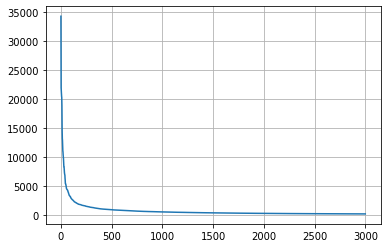

In [17]:
a=sorted(dict_features.items(), key=operator.itemgetter(1), reverse=True)[:3000]
s=a[:3000]
frequency=[i[1] for i in a]
words=[i[0] for i in a]
plt.plot(frequency)
plt.grid()
plt.show()

# Words and their corresponding frequency

In [18]:
data = np.array([np.array(x) for x in a])
data

array([['news', '34309'],
       ['cantaloupe', '26048'],
       ['message', '21954'],
       ...,
       ['spdcc', '174'],
       ['silicon', '174'],
       ['timothy', '174']], dtype='<U14')

In [21]:
a

[('news', 34309),
 ('cantaloupe', 26048),
 ('message', 21954),
 ('from', 21616),
 ('subject', 21589),
 ('lines', 20894),
 ('date', 20787),
 ('newsgroups', 20404),
 ('path', 20369),
 ('organization', 19840),
 ('state', 18842),
 ('ohio', 15887),
 ('writes', 14686),
 ('article', 13435),
 ('comp', 13101),
 ('references', 12981),
 ('talk', 12308),
 ('misc', 11892),
 ('sender', 11040),
 ('howland', 10981),
 ('reston', 10946),
 ('people', 10364),
 ('like', 10350),
 ('just', 9978),
 ('university', 9958),
 ('posting', 9793),
 ('nntp', 9377),
 ('know', 9173),
 ('host', 8934),
 ('think', 8315),
 ('usenet', 8308),
 ('zaphod', 8302),
 ('this', 7954),
 ('politics', 7869),
 ('windows', 7584),
 ('does', 7267),
 ('time', 7073),
 ('rutgers', 7014),
 ('harvard', 6923),
 ('near', 6868),
 ('good', 6308),
 ('crabapple', 6235),
 ('xref', 6064),
 ('europa', 5448),
 ('gtefsd', 5429),
 ('uunet', 5369),
 ('world', 5354),
 ('religion', 5351),
 ('make', 5191),
 ('what', 5184),
 ('christian', 5129),
 ('right', 4943

In [25]:
vocabulary=list(a)
vocabulary

[('news', 34309),
 ('cantaloupe', 26048),
 ('message', 21954),
 ('from', 21616),
 ('subject', 21589),
 ('lines', 20894),
 ('date', 20787),
 ('newsgroups', 20404),
 ('path', 20369),
 ('organization', 19840),
 ('state', 18842),
 ('ohio', 15887),
 ('writes', 14686),
 ('article', 13435),
 ('comp', 13101),
 ('references', 12981),
 ('talk', 12308),
 ('misc', 11892),
 ('sender', 11040),
 ('howland', 10981),
 ('reston', 10946),
 ('people', 10364),
 ('like', 10350),
 ('just', 9978),
 ('university', 9958),
 ('posting', 9793),
 ('nntp', 9377),
 ('know', 9173),
 ('host', 8934),
 ('think', 8315),
 ('usenet', 8308),
 ('zaphod', 8302),
 ('this', 7954),
 ('politics', 7869),
 ('windows', 7584),
 ('does', 7267),
 ('time', 7073),
 ('rutgers', 7014),
 ('harvard', 6923),
 ('near', 6868),
 ('good', 6308),
 ('crabapple', 6235),
 ('xref', 6064),
 ('europa', 5448),
 ('gtefsd', 5429),
 ('uunet', 5369),
 ('world', 5354),
 ('religion', 5351),
 ('make', 5191),
 ('what', 5184),
 ('christian', 5129),
 ('right', 4943

In [26]:
#convert to dataframe
df = pd.DataFrame(data[1:])
df.head()

,0,1
0,cantaloupe,26048
1,message,21954
2,from,21616
3,subject,21589
4,lines,20894


In [27]:
#Save the vocabulary file
os.chdir('/Users/arunav.dey.7/Desktop/Machine Learning Course Data/')
df.to_csv("vocabulary.csv")

# Loading the contents of vocabulary.csv in a DataFrame 

In [28]:
import pandas as pd
dataframe=pd.DataFrame(vocabulary)

In [29]:
dataframe = pd.read_csv("vocabulary.csv",delimiter=",")
dataframe = dataframe.drop('Unnamed: 0',axis=1)

In [30]:
K = 3000
words = list(dataframe[:K]['0'])
words

['cantaloupe',
 'message',
 'from',
 'subject',
 'lines',
 'date',
 'newsgroups',
 'path',
 'organization',
 'state',
 'ohio',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'sender',
 'howland',
 'reston',
 'people',
 'like',
 'just',
 'university',
 'posting',
 'nntp',
 'know',
 'host',
 'think',
 'usenet',
 'zaphod',
 'this',
 'politics',
 'windows',
 'does',
 'time',
 'rutgers',
 'harvard',
 'near',
 'good',
 'crabapple',
 'xref',
 'europa',
 'gtefsd',
 'uunet',
 'world',
 'religion',
 'make',
 'what',
 'christian',
 'right',
 'rochester',
 'distribution',
 'club',
 'space',
 'mail',
 'andrew',
 'want',
 'gatech',
 'magnesium',
 'they',
 'said',
 'udel',
 'reply',
 'utexas',
 'used',
 'culture',
 'need',
 'there',
 'uiuc',
 'work',
 'nasa',
 'really',
 'problem',
 'computer',
 'sura',
 'believe',
 'graphics',
 'hardware',
 'netcom',
 'years',
 'going',
 'government',
 'information',
 'help',
 'point',
 'that',
 'file',
 'better',
 'year',
 'using',
 'question',
 

# Now we'll add a column for 'CLASSIFICATION' in our Data Frame

In [31]:
#Append the classification
columns = words
columns.append('CLASSIFICATION')
columns

['cantaloupe',
 'message',
 'from',
 'subject',
 'lines',
 'date',
 'newsgroups',
 'path',
 'organization',
 'state',
 'ohio',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'sender',
 'howland',
 'reston',
 'people',
 'like',
 'just',
 'university',
 'posting',
 'nntp',
 'know',
 'host',
 'think',
 'usenet',
 'zaphod',
 'this',
 'politics',
 'windows',
 'does',
 'time',
 'rutgers',
 'harvard',
 'near',
 'good',
 'crabapple',
 'xref',
 'europa',
 'gtefsd',
 'uunet',
 'world',
 'religion',
 'make',
 'what',
 'christian',
 'right',
 'rochester',
 'distribution',
 'club',
 'space',
 'mail',
 'andrew',
 'want',
 'gatech',
 'magnesium',
 'they',
 'said',
 'udel',
 'reply',
 'utexas',
 'used',
 'culture',
 'need',
 'there',
 'uiuc',
 'work',
 'nasa',
 'really',
 'problem',
 'computer',
 'sura',
 'believe',
 'graphics',
 'hardware',
 'netcom',
 'years',
 'going',
 'government',
 'information',
 'help',
 'point',
 'that',
 'file',
 'better',
 'year',
 'using',
 'question',
 

# Preview of all the features of the Dataframe

In [32]:
df = pd.DataFrame(columns=columns)
df

,cantaloupe,message,from,subject,lines,date,newsgroups,path,organization,state,...,amazing,bears,classic,controls,carolina,blow,spdcc,silicon,timothy,CLASSIFICATION


In [37]:
#going through the file
from os import listdir
from string import punctuation
import re
countDir = 0
totalDir = len(os.listdir(os.getcwd()))
ls =listdir('/Users/arunav.dey.7/Desktop/Machine Learning Course Data/20_newsgroups/')
for folder in ls:
    if(folder=='.DS_Store'):continue
    files=listdir('/Users/arunav.dey.7/Desktop/Machine Learning Course Data/20_newsgroups/'+folder)
    count=0
    dirData = [[0]*len(words)]
    for file in files:
        row_data = [0]*len(words)
        f=open('/Users/arunav.dey.7/Desktop/Machine Learning Course Data/20_newsgroups/'+folder+'/'+file,'r',encoding="ISO-8859-1")
        for word in f.read().split():
            word = word.strip(punctuation).lower()
            #if word not in stop_words and word not in ignore_words and word.isalpha() and len(word)!=1:
            if word in words:
                row_data[columns.index(word)] = row_data[columns.index(word)] + 1
        row_data[columns.index('CLASSIFICATION')] = folder
        dirData.append(row_data)
        count += 1
        if count%100 == 0:
            print("Done with files: ", count)
    tempDF = pd.DataFrame(dirData[1:], columns=columns)
    df = df.append(tempDF, ignore_index=True)
    countDir += 1
    print("Done with directory: ", folder)
    print("Number: ", countDir, "of", totalDir)

Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done with files:  700
Done with files:  800
Done with files:  900
Done with files:  1000
Done with directory:  talk.politics.mideast
Number:  1 of 60
Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done with files:  700
Done with files:  800
Done with files:  900
Done with files:  1000
Done with directory:  rec.autos
Number:  2 of 60
Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done with files:  700
Done with files:  800
Done with files:  900
Done with files:  1000
Done with directory:  comp.sys.mac.hardware
Number:  3 of 60
Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done with files:  700
Done with fi

In [38]:
df

,cantaloupe,message,from,subject,lines,date,newsgroups,path,organization,state,...,amazing,bears,classic,controls,carolina,blow,spdcc,silicon,timothy,CLASSIFICATION
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,talk.politics.mideast
1,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,talk.politics.mideast
2,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,talk.politics.mideast
3,0,0,3,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,talk.politics.mideast
4,0,0,2,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,talk.politics.mideast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20992,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,talk.religion.misc
20993,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,talk.religion.misc
20994,0,0,1,1,2,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,talk.religion.misc
20995,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,talk.religion.misc


In [39]:
#Saving the file
os.chdir('/Users/arunav.dey.7/Desktop/Machine Learning Course Data/')
df.to_csv("TextClassification.csv")

In [40]:
columns = words
columns.append('CLASSIFICATION')
columns

['cantaloupe',
 'message',
 'from',
 'subject',
 'lines',
 'date',
 'newsgroups',
 'path',
 'organization',
 'state',
 'ohio',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'sender',
 'howland',
 'reston',
 'people',
 'like',
 'just',
 'university',
 'posting',
 'nntp',
 'know',
 'host',
 'think',
 'usenet',
 'zaphod',
 'this',
 'politics',
 'windows',
 'does',
 'time',
 'rutgers',
 'harvard',
 'near',
 'good',
 'crabapple',
 'xref',
 'europa',
 'gtefsd',
 'uunet',
 'world',
 'religion',
 'make',
 'what',
 'christian',
 'right',
 'rochester',
 'distribution',
 'club',
 'space',
 'mail',
 'andrew',
 'want',
 'gatech',
 'magnesium',
 'they',
 'said',
 'udel',
 'reply',
 'utexas',
 'used',
 'culture',
 'need',
 'there',
 'uiuc',
 'work',
 'nasa',
 'really',
 'problem',
 'computer',
 'sura',
 'believe',
 'graphics',
 'hardware',
 'netcom',
 'years',
 'going',
 'government',
 'information',
 'help',
 'point',
 'that',
 'file',
 'better',
 'year',
 'using',
 'question',
 

In [62]:
df = pd.DataFrame(columns=columns)
df

,cantaloupe,message,from,subject,lines,date,newsgroups,path,organization,state,...,bears,classic,controls,carolina,blow,spdcc,silicon,timothy,CLASSIFICATION,CLASSIFICATION


# Going through the Files

In [43]:
from os import listdir
from string import punctuation
import re
countDir = 0
totalDir = len(os.listdir(os.getcwd()))
ls =listdir('/Users/arunav.dey.7/Desktop/Machine Learning Course Data/20_newsgroups/')
for folder in ls:
    if(folder=='.DS_Store'):continue
    files=listdir('/Users/arunav.dey.7/Desktop/Machine Learning Course Data/20_newsgroups/'+folder)
    count=0
    dirData = [[0]*len(words)]
    for file in files:
        row_data = [0]*len(words)
        f=open('/Users/arunav.dey.7/Desktop/Machine Learning Course Data/20_newsgroups/'+folder+'/'+file,'r',encoding="ISO-8859-1")
        for word in f.read().split():
            word = word.strip(punctuation).lower()
            #if word not in stop_words and word not in ignore_words and word.isalpha() and len(word)!=1:
            if word in words:
                row_data[columns.index(word)] = row_data[columns.index(word)] + 1
        row_data[columns.index('CLASSIFICATION')] = folder
        dirData.append(row_data)
        count += 1
        if count%100 == 0:
            print("Done with files: ", count)
    tempDF = pd.DataFrame(dirData[1:], columns=columns)
    df = df.append(tempDF, ignore_index=True)
    countDir += 1
    print("Done with directory: ", folder)
    print("Number: ", countDir, "of", totalDir)

Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done with files:  700
Done with files:  800
Done with files:  900
Done with files:  1000
Done with directory:  talk.politics.mideast
Number:  1 of 61
Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done with files:  700
Done with files:  800
Done with files:  900
Done with files:  1000
Done with directory:  rec.autos
Number:  2 of 61
Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done with files:  700
Done with files:  800
Done with files:  900
Done with files:  1000
Done with directory:  comp.sys.mac.hardware
Number:  3 of 61
Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done with files:  700
Done with fi

In [44]:
df.head()

,cantaloupe,message,from,subject,lines,date,newsgroups,path,organization,state,...,bears,classic,controls,carolina,blow,spdcc,silicon,timothy,CLASSIFICATION,CLASSIFICATION
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,talk.politics.mideast,0
1,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,talk.politics.mideast,0
2,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,talk.politics.mideast,0
3,0,0,3,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,talk.politics.mideast,0
4,0,0,2,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,talk.politics.mideast,0


# Loading up the dependencies

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
df = pd.read_csv("/Users/arunav.dey.7/Desktop/Machine Learning Course Data/TextClassification.csv",delimiter=",")
df = df.drop('Unnamed: 0',axis=1)
df.head()

,cantaloupe,message,from,subject,lines,date,newsgroups,path,organization,state,...,amazing,bears,classic,controls,carolina,blow,spdcc,silicon,timothy,CLASSIFICATION
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,talk.politics.mideast
1,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,talk.politics.mideast
2,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,talk.politics.mideast
3,0,0,3,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,talk.politics.mideast
4,0,0,2,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,talk.politics.mideast


In [47]:
df.CLASSIFICATION = pd.Categorical(df.CLASSIFICATION)
df['TARGET'] = df.CLASSIFICATION.cat.codes
df.head()

,cantaloupe,message,from,subject,lines,date,newsgroups,path,organization,state,...,bears,classic,controls,carolina,blow,spdcc,silicon,timothy,CLASSIFICATION,TARGET
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,talk.politics.mideast,17
1,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,talk.politics.mideast,17
2,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,talk.politics.mideast,17
3,0,0,3,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,talk.politics.mideast,17
4,0,0,2,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,talk.politics.mideast,17


In [48]:
df = df.drop('CLASSIFICATION',axis=1)
df.head()

,cantaloupe,message,from,subject,lines,date,newsgroups,path,organization,state,...,amazing,bears,classic,controls,carolina,blow,spdcc,silicon,timothy,TARGET
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,17
1,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,17
2,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,17
3,0,0,3,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,17
4,0,0,2,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,17


# Splitting of Test and Train Data

In [49]:
data=df.values
data

array([[ 0,  1,  1, ...,  0,  0, 17],
       [ 0,  0,  1, ...,  0,  0, 17],
       [ 0,  0,  1, ...,  0,  0, 17],
       ...,
       [ 0,  0,  1, ...,  0,  0, 19],
       [ 0,  0,  1, ...,  0,  0, 19],
       [ 0,  0,  4, ...,  0,  0, 19]])

In [50]:

y_train = data[:,-1]
y_train.shape

(20997,)

In [51]:
x_train = data[:,:-1]
x_train.shape

(20997, 2999)

In [52]:
df_test = pd.read_csv("/Users/arunav.dey.7/Desktop/Machine Learning Course Data/TextClassification.csv",delimiter=",")
df_test = df_test.drop('Unnamed: 0',axis=1)
df_test.CLASSIFICATION = pd.Categorical(df_test.CLASSIFICATION)
df_test['TARGET'] = df_test.CLASSIFICATION.cat.codes
df_test = df_test.drop('CLASSIFICATION',axis=1)
data_test = df_test.values
y_test = data_test[:,-1]
x_test = data_test[:,:-1]

# Predicting the precision and applying Multinomial Naive Bayes

In [56]:

clf = MultinomialNB()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.71      0.82      0.76      1000
           1       0.73      0.66      0.69      1000
           2       0.68      0.81      0.74      1000
           3       0.75      0.74      0.74      1000
           4       0.72      0.78      0.75      1000
           5       0.88      0.73      0.80      1000
           6       0.68      0.91      0.78      1000
           7       0.82      0.85      0.84      1000
           8       0.80      0.92      0.86      1000
           9       0.94      0.91      0.92      1000
          10       0.96      0.94      0.95      1000
          11       0.95      0.88      0.91      1000
          12       0.75      0.79      0.77      1000
          13       0.91      0.83      0.87      1000
          14       0.92      0.87      0.90      1000
          15       0.91      0.92      0.91       997
          16       0.71      0.87      0.78      1000
          17       0.96    